In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import linear_model as lm
from re import sub
from decimal import Decimal

In [8]:
#importing the CSV file
df=pd.read_csv("googleplaystore.csv")

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
#Printing all columns
df.columns

Index([u'App', u'Category', u'Rating', u'Reviews', u'Size', u'Installs',
       u'Type', u'Price', u'Content Rating', u'Genres', u'Last Updated',
       u'Current Ver', u'Android Ver'],
      dtype='object')

In [11]:
df.columns=df.columns.str.replace(' ','')

In [12]:
#printing all the category names
a=df.Category.unique()
len(a)

34

In [13]:
#Total number of apps in each category
df.Category.value_counts(dropna=False)

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [14]:
#Counting Rating for each category
df.groupby('Category')['Rating'].value_counts().sort_values(ascending=False)

Category            Rating
FAMILY              4.3       206
                    4.4       190
                    4.5       183
GAME                4.5       174
                    4.4       166
FAMILY              4.2       160
GAME                4.3       151
FAMILY              4.6       145
                    4.1       133
GAME                4.6       121
                    4.2       115
FAMILY              4.0       103
                    3.9        92
                    4.7        85
TOOLS               4.2        79
                    4.3        79
GAME                4.1        72
FAMILY              3.8        71
TOOLS               4.4        69
GAME                4.7        67
FAMILY              5.0        67
COMMUNICATION       4.3        67
TOOLS               4.1        62
                    4.5        62
GAME                4.0        55
HEALTH_AND_FITNESS  4.6        50
FAMILY              4.8        50
TOOLS               4.6        50
HEALTH_AND_FITNESS  4

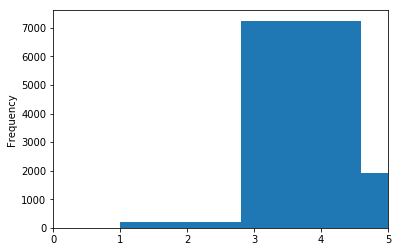

In [15]:
df.Rating.plot('hist')
plt.xlim(0,5)
plt.show()

In [16]:
df.Rating.mean()

4.193338315362448

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App              10841 non-null object
Category         10841 non-null object
Rating           9367 non-null float64
Reviews          10841 non-null object
Size             10841 non-null object
Installs         10841 non-null object
Type             10840 non-null object
Price            10841 non-null object
ContentRating    10840 non-null object
Genres           10841 non-null object
LastUpdated      10841 non-null object
CurrentVer       10833 non-null object
AndroidVer       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [18]:
df.shape

(10841, 13)

In [19]:
df.Genres.value_counts(dropna=False)

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

In [20]:
#Drop duplicates
df=df.drop_duplicates(subset=None, keep='first', inplace=False)

In [21]:
#Row with the rating greater than 5 dropped
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [22]:
#Drop row number 10472
df=df.drop(10472)


In [23]:
df[df.Rating<5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [24]:
#Removing the $ sign from the price
df['Price'] = df.Price.apply(lambda x: x.replace('$', ''))
# Print the head of df
df.Price.head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [25]:
#Copying installs in new Installs2
df['Installs2']=df['Installs']
df['Installs2']=df.Installs2.apply(lambda x: x.replace('+',''))
df['Installs2']=df.Installs2.apply(lambda x: x.replace(',',''))
df['Installs2']=(df['Installs2']).astype(int)

In [26]:
#Removing 'M' sign from the size column
df['Size'] = df.Size.apply(lambda x: x.replace('M', ''))
#df.apply(lambda row: row.astype(str).str.contains('Varies with device').any(), axis=1)
#df.drop(df.Size[df['Size'].apply(lambda s: s.str.contains("Varies with device")= True)],axis=1)
#df[df.Size.apply(lambda x: x.isnumeric())]
#df[pd.to_numeric(df['Size'], errors='coerce').notnull()]
df.Size.convert_objects(convert_numeric=True).dropna()
##Ho gyaaaa finallyy--- 

# Print the head of df
#print(df.Size.head())

C:\Users\dell\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
5         5.6
6        19.0
7        29.0
8        33.0
9         3.1
10       28.0
11       12.0
12       20.0
13       21.0
14       37.0
15        2.7
16        5.5
17       17.0
18       39.0
19       31.0
20       14.0
21       12.0
22        4.2
23        7.0
24       23.0
25        6.0
26       25.0
27        6.1
28        4.6
29        4.2
         ... 
10807     4.2
10808     1.0
10809    24.0
10810    21.0
10811     3.9
10812    13.0
10813     2.7
10814    31.0
10815     4.9
10816     6.8
10817     8.0
10818     1.5
10819     3.6
10820     8.6
10821     2.5
10822     3.1
10823     2.9
10824    82.0
10825     7.7
10827    13.0
10828    13.0
10829     7.4
10830     2.3
10831     9.8
10834     2.6
10835     9.6
10836    53.0
10837     3.6
10838     9.5
10840    19.0
Name: Size, Length: 8516, dtype: float64

In [27]:
#to find number of missing values in each column
print(df.isnull().sum())

App                 0
Category            0
Rating           1465
Reviews             0
Size                0
Installs            0
Type                1
Price               0
ContentRating       0
Genres              0
LastUpdated         0
CurrentVer          8
AndroidVer          2
Installs2           0
dtype: int64


In [28]:
df[df['Size'].str.contains("Varies with device")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer,Installs2
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,5000000
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,10000000
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,1000000
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,5000000
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device,100000
73,PDD-UA,AUTO_AND_VEHICLES,4.8,736,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 29, 2018",2.9,2.3.3 and up,100000
85,CarMax – Cars for Sale: Search Used Car Inventory,AUTO_AND_VEHICLES,4.4,21777,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 4, 2018",Varies with device,Varies with device,1000000
88,AutoScout24 Switzerland – Find your new car,AUTO_AND_VEHICLES,4.6,13372,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 3, 2018",Varies with device,Varies with device,1000000
89,Zona Azul Digital Fácil SP CET - OFFICIAL São ...,AUTO_AND_VEHICLES,4.6,7880,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 10, 2018",4.6.5,Varies with device,100000
92,Fuelio: Gas log & costs,AUTO_AND_VEHICLES,4.6,65786,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 2, 2018",Varies with device,4.0.3 and up,1000000


In [77]:
# fill missing values of Rating with mean column values
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
#fill missing values of Size with mean column values
df['Size'].fillna(df['Size'].mean(), inplace=True)
# count the number of NaN values in each column
print(df.isnull().sum())

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             1
Price            0
ContentRating    0
Genres           0
LastUpdated      0
CurrentVer       8
AndroidVer       2
Installs2        0
dtype: int64


## **Plotting graphs to find some results**

#### 1. Installs vs Rating

In [30]:
# Cleaning Installs for visualisation
df['Installs']=df.Installs.apply(lambda x: x.replace('+',''))
df['Installs']=df.Installs.apply(lambda x: x.replace(',',''))
df['Installs']=(df['Installs']).astype(int)
df.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [31]:
# **TO convert big values into small ones** 
df['Installs']=np.log(df.Installs)

C:\Users\dell\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


Text(0,0.5,'Rating')

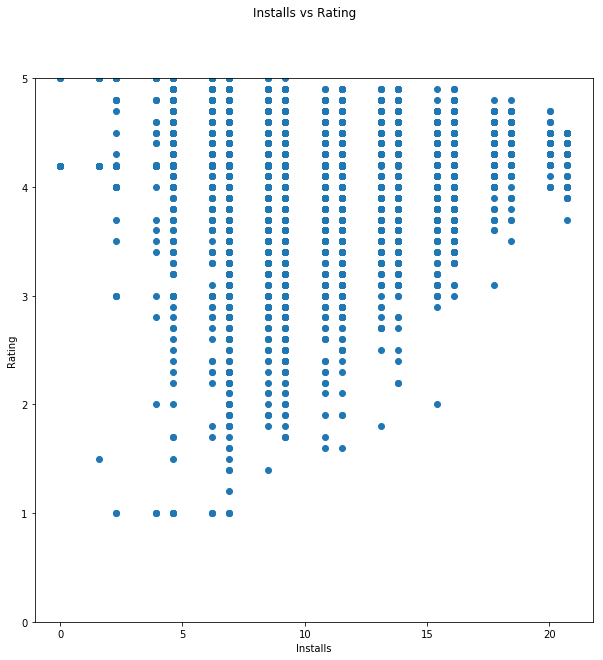

In [32]:
plt.figure(figsize=(10,10))
plt.ylim(0,5)
plt.scatter(df.Installs,df.Rating)
plt.suptitle('Installs vs Rating')
plt.xlabel('Installs')
plt.ylabel('Rating')


### Result : The graph shows the relation that as No. of installs increase, lesser are the number of low ratings.

#### 2. Rating Vs Reviews

In [33]:
#to check how many values are not convertable to int
print (df[ pd.to_numeric(df['Size'], errors='coerce').isnull()].count())

App              1841
Category         1841
Rating           1841
Reviews          1841
Size             1841
Installs         1841
Type             1840
Price            1841
ContentRating    1841
Genres           1841
LastUpdated      1841
CurrentVer       1837
AndroidVer       1841
Installs2        1841
dtype: int64


In [34]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
#print (df.head)

In [35]:
#print (df[ pd.to_numeric(df['Size'], errors='coerce').isnull()].count())

In [36]:
#Convert Reviews to float
df['Reviews']=(df['Reviews']).astype(int)
df.Reviews=((df.Reviews)/100)
df.Reviews

0           1.59
1           9.67
2         875.10
3        2156.44
4           9.67
5           1.67
6           1.78
7         368.15
8         137.91
9           1.21
10        138.80
11         87.88
12        448.29
13         43.26
14         15.18
15          0.55
16         36.32
17          0.27
18       1942.16
19       2243.99
20          4.50
21          6.54
22         76.99
23          0.61
24          1.18
25          1.92
26        202.60
27          2.03
28          1.36
29          2.23
          ...   
10811       0.04
10812       0.80
10813       0.20
10814       7.85
10815      57.75
10816       0.02
10817       8.85
10818       0.96
10819       0.52
10820       0.22
10821       0.06
10822       0.00
10823       0.01
10824       0.67
10825       0.07
10826     884.86
10827       1.17
10828       2.91
10829       6.03
10830       8.81
10831       0.38
10832      11.95
10833       0.44
10834       0.07
10835       0.00
10836       0.38
10837       0.04
10838       0.

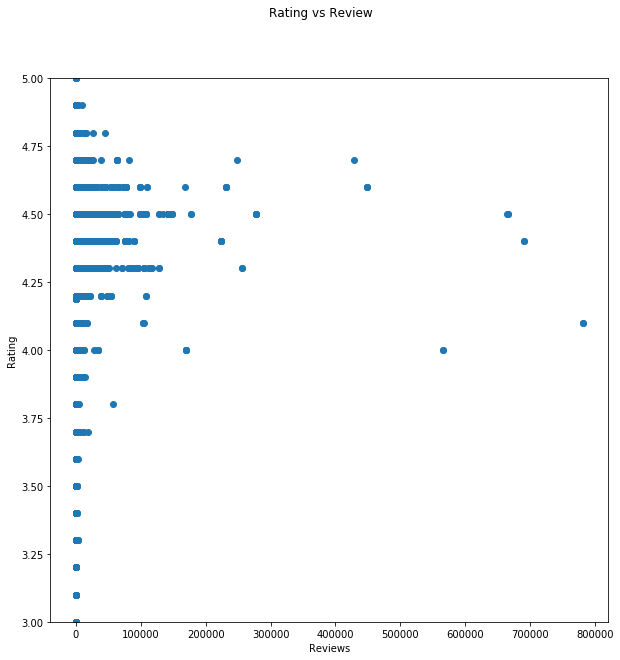

In [37]:
plt.figure(figsize=(10,10))
plt.ylim(3,5)
#plt.xlim(0,200000)
plt.suptitle('Rating vs Review')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.scatter(df.Reviews,df.Rating)

### Result: Apps with low rating do not get good amount of reviews

# Other results:

In [38]:
# Mean size of categories whose ratings are greater than 4
dbb=df[df.Rating>4].groupby('Category')['Size'].mean().reset_index()
dbb

,Category,Size
0,ART_AND_DESIGN,13.142308
1,AUTO_AND_VEHICLES,19.789583
2,BEAUTY,13.481081
3,BOOKS_AND_REFERENCE,13.156688
4,BUSINESS,14.804730
5,COMICS,16.059375
6,COMMUNICATION,12.922093
7,DATING,14.888696
8,EDUCATION,21.980247
9,ENTERTAINMENT,23.331250


Text(0,0.5,'Average size')

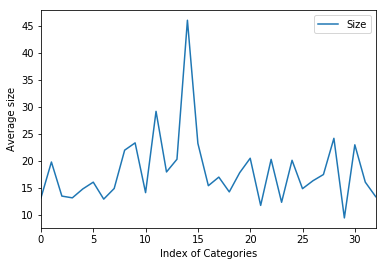

In [39]:
ax=dbb.plot(kind='line')
ax.set_xlabel("Index of Categories")
ax.set_ylabel("Average size")

### Result: The list shows what should be your approximate size  of app of a category if you aim 4+ rating

('Max: ', Category
SOCIAL    20022.716447
Name: Reviews, dtype: float64)


Text(0,0.5,'Reviews')

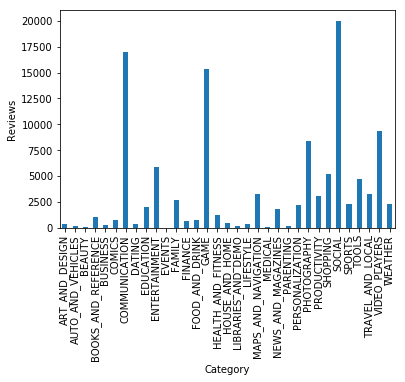

In [40]:
d2=df[df.Rating>4].groupby('Category')['Reviews'].mean()
print("Max: ", d2[d2==d2.max()])
a1=d2.plot(kind='bar',rot=90)
a1.set_ylabel("Reviews")

### Result: Social type apps tend to get higher number of average reviews for 4+ ratings

In [41]:
#Counting number of ratings for each category
d4=df.groupby('Category')['Rating'].mean()

In [42]:
d4[d4==d4.max()]

Category
EDUCATION    4.374522
Name: Rating, dtype: float64

(4, 4.5)

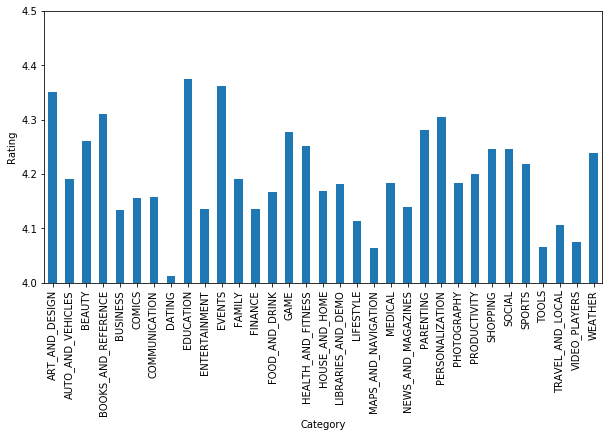

In [43]:
a = d4.plot.bar(x='Category', y='Rating', rot=90, figsize=(10,5))
a.set_ylabel("Rating")
a.set_ylim(4,4.5)

In [44]:
# plt.bar(df.Installs, df.Rating, width = 1, color = ['green'])

#### Result: Education field apps tend to be more successful in terms of average ratings

In [45]:
d3=(df[df.Rating>4].groupby('Category')['Installs2'].mean())
#d3.head
print(d3[d3==d3.max()])

Category
COMMUNICATION    6.484474e+07
Name: Installs2, dtype: float64


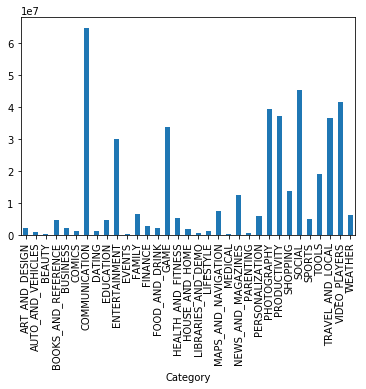

In [46]:
d3.plot(kind='bar')

### Communication apps tend to have more number of installs 

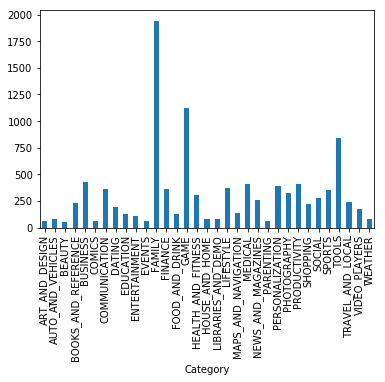

In [47]:
df5=df.groupby('Category')['ContentRating'].count()
df5.plot(kind='bar')

### Apps of Family Category are most in number on Google Play Store

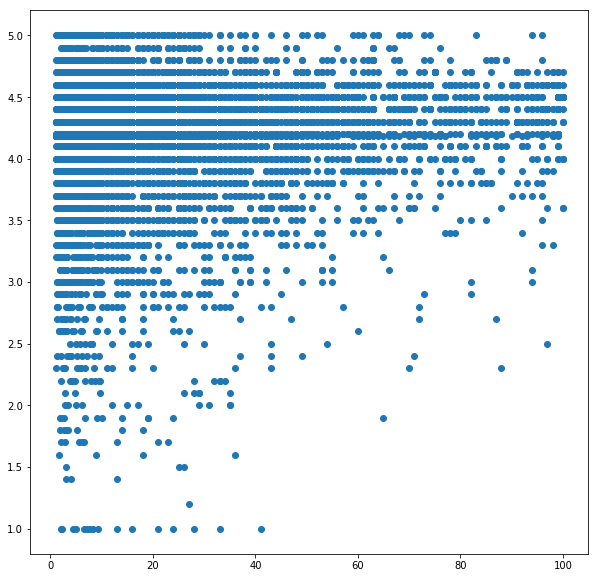

In [48]:
df4=df.groupby('Size')['Rating'].mean()
df4[df4==df4.max()]
plt.figure(figsize=(10,10))
plt.scatter(df.Size,df.Rating)
#plt.xlabel("Size")

In [49]:
#removed and up from And version column
#df['AndroidVer'] = df['AndroidVer'].astype(str).str.replace('\Dand up', '')
#df.AndroidVer

In [50]:
#Total number of apps for each age group 
df['ContentRating'].value_counts(dropna=False)

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: ContentRating, dtype: int64

In [51]:
d20=df.groupby('ContentRating')['Reviews'].mean()
d20[d20==d20.max()]

ContentRating
Everyone 10+    15645.773475
Name: Reviews, dtype: float64

Text(0,0.5,'Reviews')

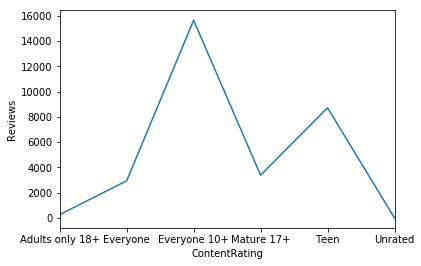

In [52]:
a1=d20.plot(kind='line')
a1.set_ylabel("Reviews")

### Apps of Content Rating 'Everyone 10+' has received most reviews

In [53]:
d7=df.groupby('ContentRating')['Rating'].mean()
d7[d7==d7.max()]

ContentRating
Adults only 18+    4.3
Name: Rating, dtype: float64

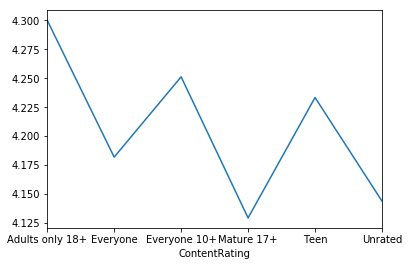

In [54]:
d7.plot(y=(0,5))

### Higest average ratings are for the apps with Content Rating of 'Adults only 18+'

In [55]:
d4=df.groupby('ContentRating')['Installs2'].mean()
d4[d4==d4.max()]

ContentRating
Everyone 10+    2.968507e+07
Name: Installs2, dtype: float64

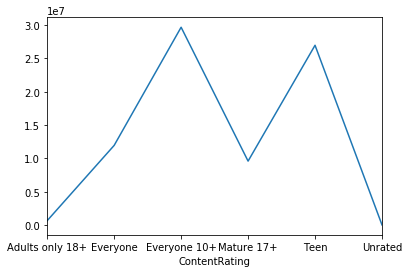

In [56]:
d4.plot()

### Apps with Content Rating of 'Everyone 10+' get most number of downloads.

# Pridictive analysis

In [59]:
pd.get_dummies(data=df, columns=['Category','ContentRating'])

,App,Rating,Reviews,Size,Installs,Type,Price,Genres,LastUpdated,CurrentVer,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,ContentRating_Adults only 18+,ContentRating_Everyone,ContentRating_Everyone 10+,ContentRating_Mature 17+,ContentRating_Teen,ContentRating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.100000,1.59,19.0,9.210340,Free,0,Art & Design,"January 7, 2018",1.0.0,...,0,0,0,0,0,1,0,0,0,0
1,Coloring book moana,3.900000,9.67,14.0,13.122363,Free,0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,...,0,0,0,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.700000,875.10,8.7,15.424948,Free,0,Art & Design,"August 1, 2018",1.2.4,...,0,0,0,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,4.500000,2156.44,25.0,17.727534,Free,0,Art & Design,"June 8, 2018",Varies with device,...,0,0,0,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,4.300000,9.67,2.8,11.512925,Free,0,Art & Design;Creativity,"June 20, 2018",1.1,...,0,0,0,0,0,1,0,0,0,0
5,Paper flowers instructions,4.400000,1.67,5.6,10.819778,Free,0,Art & Design,"March 26, 2017",1.0,...,0,0,0,0,0,1,0,0,0,0
6,Smoke Effect Photo Maker - Smoke Editor,3.800000,1.78,19.0,10.819778,Free,0,Art & Design,"April 26, 2018",1.1,...,0,0,0,0,0,1,0,0,0,0
7,Infinite Painter,4.100000,368.15,29.0,13.815511,Free,0,Art & Design,"June 14, 2018",6.1.61.1,...,0,0,0,0,0,1,0,0,0,0
8,Garden Coloring Book,4.400000,137.91,33.0,13.815511,Free,0,Art & Design,"September 20, 2017",2.9.2,...,0,0,0,0,0,1,0,0,0,0
9,Kids Paint Free - Drawing Fun,4.700000,1.21,3.1,9.210340,Free,0,Art & Design;Creativity,"July 3, 2018",2.8,...,0,0,0,0,0,1,0,0,0,0


In [76]:
#dcat dataframe has size, onehot of category and content rating
dcat=pd.get_dummies(df,columns=['Category','ContentRating'])
dcat=dcat.drop(['App','Rating','Reviews','Price','Installs','Installs2','Type','Genres','LastUpdated','CurrentVer','AndroidVer'], axis=1)
dcat.head

<bound method DataFrame.head of             Size  Category_artanddesign  Category_autoandvehicles  \
0      19.000000                      1                         0   
1      14.000000                      1                         0   
2       8.700000                      1                         0   
3      25.000000                      1                         0   
4       2.800000                      1                         0   
5       5.600000                      1                         0   
6      19.000000                      1                         0   
7      29.000000                      1                         0   
8      33.000000                      1                         0   
9       3.100000                      1                         0   
10     28.000000                      1                         0   
11     12.000000                      1                         0   
12     20.000000                      1                         0   
13

In [60]:
import scipy
import sklearn
#import scikit-learn
import nltk

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(df['Genres'])
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Some Pre-processing of data for the use of predictive analysis

In [63]:
#Convert all text of Category
df['Category'] = df['Category'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]",'',str(x))))
df['Category'] = df['Category'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.Category.head()

0    artanddesign
1    artanddesign
2    artanddesign
3    artanddesign
4    artanddesign
Name: Category, dtype: object

In [64]:
df['Genres'] = df.Genres.apply(lambda x: x.replace(';', " "))
#Convert all text of Genres
df['Genres'] = df['Genres'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]",'',str(x))))
df['Genres'] = df['Genres'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.Genres.head()

0                 art design
1    art design pretend play
2                 art design
3                 art design
4      art design creativity
Name: Genres, dtype: object

In [65]:
#Convert all text of Content Rating
df['ContentRating'] = df['ContentRating'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]",'',str(x))))
df['ContentRating'] = df['ContentRating'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['ContentRating'].head()

0    everyone
1    everyone
2    everyone
3        teen
4    everyone
Name: ContentRating, dtype: object

In [79]:
#dx dataframe contains size and price
dx=df.drop(['App','Category','Rating','Reviews','Installs','Installs2','Type','ContentRating','Genres','LastUpdated','CurrentVer','AndroidVer'], xis=1)
print(dx.head)

<bound method DataFrame.head of             Size Price
0      19.000000     0
1      14.000000     0
2       8.700000     0
3      25.000000     0
4       2.800000     0
5       5.600000     0
6      19.000000     0
7      29.000000     0
8      33.000000     0
9       3.100000     0
10     28.000000     0
11     12.000000     0
12     20.000000     0
13     21.000000     0
14     37.000000     0
15      2.700000     0
16      5.500000     0
17     17.000000     0
18     39.000000     0
19     31.000000     0
20     14.000000     0
21     12.000000     0
22      4.200000     0
23      7.000000     0
24     23.000000     0
25      6.000000     0
26     25.000000     0
27      6.100000     0
28      4.600000     0
29      4.200000     0
...          ...   ...
10811   3.900000     0
10812  13.000000     0
10813   2.700000     0
10814  31.000000     0
10815   4.900000     0
10816   6.800000     0
10817   8.000000     0
10818   1.500000     0
10819   3.600000     0
10820   8.600000     0
10

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf on Genres
v = TfidfVectorizer()
x = v.fit_transform(df['Genres'])
print(v.vocabulary_)
print(v.idf_)
x.toarray()
#to convert sparse matrix to dataframe
a1=pd.DataFrame(x.todense())
type(a1)

{u'communication': 15, u'puzzle': 50, u'brain': 9, u'weather': 64, u'magazines': 36, u'sports': 57, u'tools': 59, u'arcade': 2, u'creativity': 16, u'editors': 21, u'strategy': 58, u'music': 39, u'board': 7, u'house': 32, u'role': 53, u'local': 35, u'shopping': 54, u'finance': 26, u'food': 28, u'auto': 5, u'photography': 44, u'trivia': 61, u'word': 65, u'comics': 14, u'pretend': 48, u'fitness': 27, u'design': 19, u'vehicles': 62, u'art': 3, u'reference': 52, u'demo': 18, u'books': 8, u'video': 63, u'personalization': 43, u'home': 31, u'education': 22, u'casual': 13, u'educational': 23, u'productivity': 49, u'beauty': 6, u'entertainment': 24, u'travel': 60, u'libraries': 33, u'maps': 37, u'health': 30, u'dating': 17, u'racing': 51, u'events': 25, u'play': 45, u'business': 10, u'drink': 20, u'parenting': 42, u'adventure': 1, u'news': 41, u'card': 11, u'lifestyle': 34, u'medical': 38, u'casino': 12, u'simulation': 55, u'players': 46, u'games': 29, u'social': 56, u'action': 0, u'audio': 4, 

pandas.core.frame.DataFrame

In [81]:
#tfidf on APP
y = TfidfVectorizer()
z = y.fit_transform(df['App'])
#print(y.vocabulary_)
#print(y.idf_)
#to convert sparse matrix to dataframe
a2=pd.DataFrame(z.todense())
type(a2)
#w=np.concatenate((z,x),axis=1)
#sp_arr = csr_matrix(z)
#sdf = pd.SparseDataFrame(sp_arr)

pandas.core.frame.DataFrame

In [87]:
#to join dcat and dx
#d = pd.merge(dcat, dx, left_on='Size', right_on='Size')
#print(d.head())

In [86]:
# Joining dcat and dx dataframes
dq= pd.concat([dcat, dx],axis=1)
dq.head

<bound method DataFrame.head of             Size  Category_artanddesign  Category_autoandvehicles  \
0      19.000000                      1                         0   
1      14.000000                      1                         0   
2       8.700000                      1                         0   
3      25.000000                      1                         0   
4       2.800000                      1                         0   
5       5.600000                      1                         0   
6      19.000000                      1                         0   
7      29.000000                      1                         0   
8      33.000000                      1                         0   
9       3.100000                      1                         0   
10     28.000000                      1                         0   
11     12.000000                      1                         0   
12     20.000000                      1                         0   
13

In [88]:
## Now dq contains Category, Content Rating, Size and price in numerical form. SO it can be used as dq for predictive analysis